# Part II - (ProsperLoan Dataset Explanatory Analysis)
## by (Tabitha Wanjiru Muhiukia)

## Investigation Overview

### Summary of key Insights from the ProsperLoan Dataset Explanatory Analysis:

> - Term of the loan compared to Employment Status

> - Relationship between the Defaulted Loans and Credit Grade

> - Loan_Status compared to Disbursed_Amount

> - Term of the Loan compared to Disbursed_Amount

> - Investigating between Disbursed_Amount, Loan_Status and Employment_Status

> - Relationship between the Completed Loans and  Credit Grade

> - Loan_Status compared with the Investors

> - Relationship betwee Loan_Status and Employement

> - Term of the loan compared with Credit_Grade


## Dataset Overview

ProsperLoan Dataset has 113937 rows and 81 rows. For my analysis i have narrowed down and now my dataset has 113937 rows and 12 columns

In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [37]:
# load in the dataset into a pandas dataframe
data=pd.read_csv(r"C:\Users\Tabitha\Desktop\UDACITY\Project_3\prosperLoanData.csv")

In [38]:
selected_data=['EstimatedLoss', 'Investors', 'Term', 'LoanStatus', 'ProsperRating (Alpha)', 
               'LoanKey', 'LoanOriginalAmount', 'LoanOriginationDate', 'EmploymentStatus', 
               'ListingCategory (numeric)', 'TotalProsperLoans', 'ProsperScore']

In [39]:
df=data[selected_data]

In [40]:
df=df.dropna(subset=['ProsperRating (Alpha)'])

In [41]:
df['TotalProsperLoans']=df['TotalProsperLoans'].fillna(0)

In [42]:
df.rename(index=str,columns={'EstimatedLoss':'Estimated_Loss', 
                            'LoanStatus':'Loan_Status',
                            'ProsperRating (Alpha)':'Credit_Grade',
                            'LoanKey':'Loan_Key',
                            'LoanOriginalAmount':'Disbursed_Amount',
                            'LoanOriginationDate':'Disbursed_Date',
                            'EmploymentStatus':'Employment_Status',
                            'ListingCategory (numeric)':'Listing_Category',
                            'TotalProsperLoans':'Total_Loans',
                            'ProsperScore':'Prosper_Score'}, inplace=True)

In [43]:
loan_group=(df['Loan_Status']=='Completed')|(df['Loan_Status']=='Defaulted')|(df['Loan_Status']=='Chargedoff')

In [44]:
Loans=df[loan_group]

In [45]:
def loan_trans(row):
    if row['Loan_Status']=='Chargedoff':
        return 'Defaulted'
    else:
        return row['Loan_Status']
Loans['Loan_Status']=Loans.apply(loan_trans,axis=1)

### Comparison between Employment Status and Term

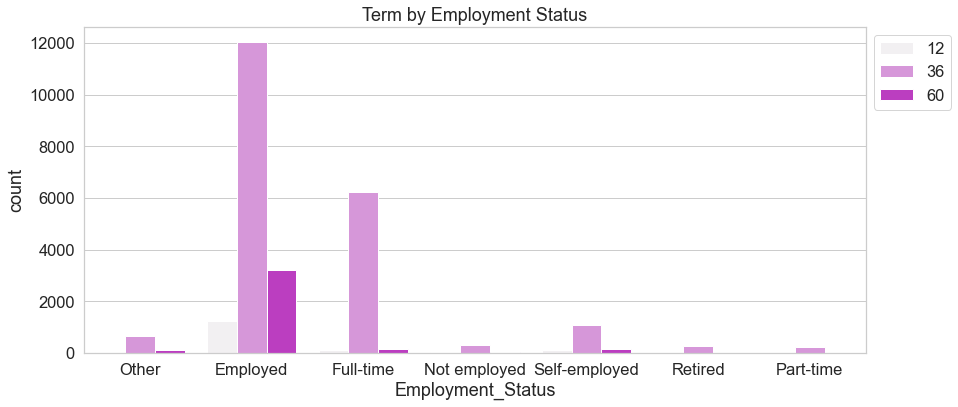

In [46]:
plt.figure(figsize = [14,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.countplot(data =Loans, x = 'Employment_Status', hue = 'Term', color = '#CF28D6')
plt.title("Term by Employment Status")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.savefig('Term_EmploymentStatus.png', dpi=300, bbox_inches='tight');
plt.show();

#### Observation:
   Most of the employed customer preferred the 36 month loan tenure

### Relationship between the Defaulted Loans and Credit Grade

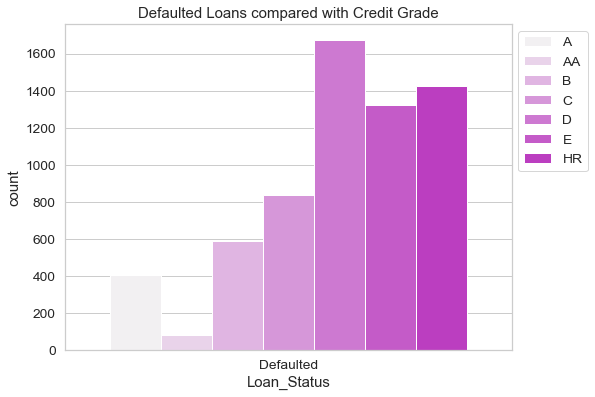

In [47]:
plt.figure(figsize=(8,6))
sb.set(style='whitegrid',font_scale=1.25)
sb.countplot(data=Loans[Loans['Loan_Status']=='Defaulted'],x='Loan_Status',hue='Credit_Grade',
             hue_order=['A','AA','B','C','D','E','HR'],color='#CF28D6')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Defaulted Loans compared with Credit Grade')
plt.savefig('Defaulted_LoansvsCredit_Grade.png', dpi=300, bbox_inches='tight')
plt.show()

#### Observation:
The credit_Grade D of the Defaulted Loans is more than 1600 in count.

### Comparison between Disbursed_Amount and Loan_Status

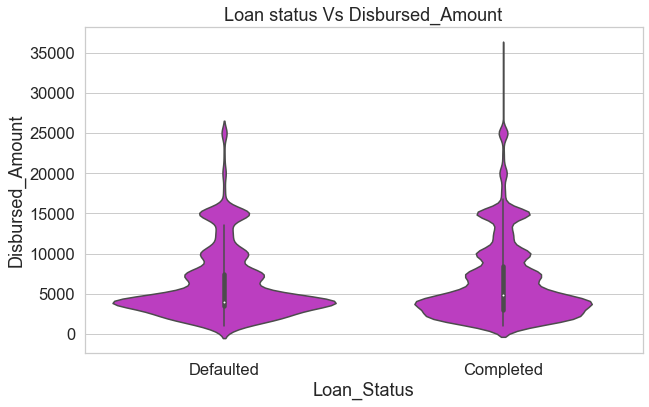

In [48]:
plt.figure(figsize = [10,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.violinplot(data=Loans, x='Loan_Status', y = "Disbursed_Amount", color ='#CF28D6')
plt.title("Loan status Vs Disbursed_Amount")
plt.savefig('loan_status_Disbursed_Amount.png', dpi=300, bbox_inches='tight')
plt.show();

### Observation 
Defaulted Loans had majority of accounts falling below usd 5000 compared to completed Loans.

### Comparison between Disbursed_Amount and Term

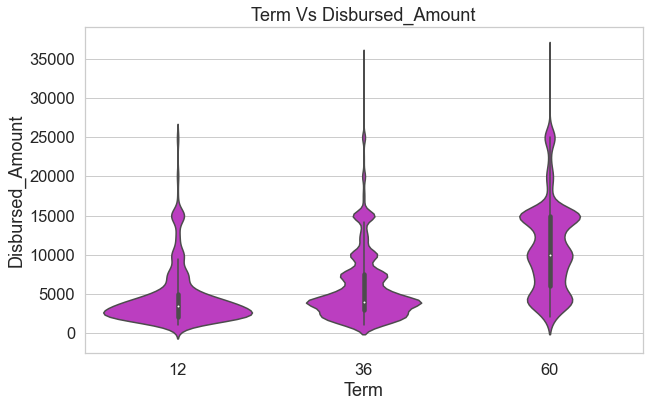

In [49]:
plt.figure(figsize = [10,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.violinplot(data=Loans, x='Term', y = "Disbursed_Amount", color ='#CF28D6')
plt.title("Term Vs Disbursed_Amount")
plt.savefig('Term_Disbursed_Amount.png', dpi=300, bbox_inches='tight')
plt.show();

### Observation:
   Median amounts for 12 and 36 months falls below usd 5000 while for 60 months is at usd 10000

### Investigating between Disbursed_Amount, Loan_Status and Employment_Status

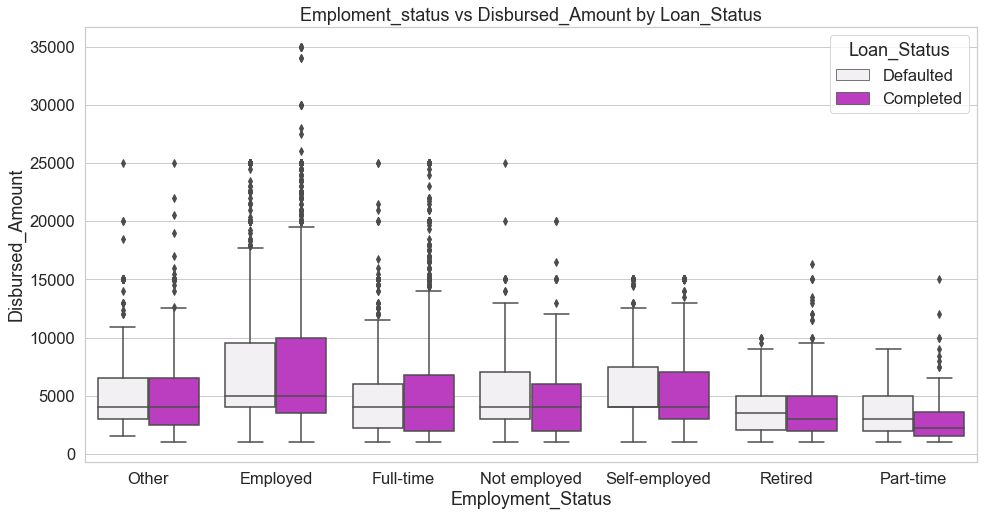

In [50]:
plt.figure(figsize = (16,8))
sb.set(style="whitegrid", font_scale = 1.5)
sb.boxplot(data = Loans, x = 'Employment_Status', y = 'Disbursed_Amount', hue = 'Loan_Status', color = '#CF28D6')
plt.title("Emploment_status vs Disbursed_Amount by Loan_Status")
plt.savefig('Emploment_statusvsDisbursed_AmountbyLoan_Status', dpi=300, bbox_inches='tight');
plt.show()

### Observation:
   For employed customers the mean disbursed amount is at usd 5000 with an outlier of about 35000

In [51]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 808628 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Tabitha\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Tabitha\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Tabitha\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Tabitha\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\Tabitha\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename